# Noções de estatística

A Estatística é um ramo da Matemática que estuda como se pode usar uma **amostra** para tirar conclusões sobre um universo maior de objetos, levando em conta que sempre há **variação** e **incerteza** nas medidas consideradas.
* **População**: todos os dados de interesse; representa o alvo da investigação
* **Amostra**: um subconjunto da população; por meio de amostras se estabelecem ou se estimam as características da população
* **Variação**: se o processo de gerar uma amostra é aleatório e gerarmos duas amostras distintas para estudar um mesmo processo, então provavelmente vamos obter dois resultados diferentes
* **Incerteza**: não é possível verificar se o resultado obtido com a amostra é igual àquele que obteríamos com a população inteira

A Estatística está presente na base de toda a ciência experimental, pois ela fornece diretrizes para a coleta de dados, nos permite comparar diferentes hipóteses e avaliar a precisão dos resultados que obtemos experimentalmente. 

A Estatística moderna emprega amplamente ferramentas computacionais.

Hoje em dia, ferramentas de software de baixo custo ou mesmo gratuitas disponibilizam métodos sofisticados de
análise estatística a qualquer um que tenha um computador pessoal.

Ao mesmo tempo, avanços recentes da Computação tornaram viável a análise estatística de volumes gigantescos de dados, como aqueles produzidos por experimentos de bioinformática, física de alta energia ou por sites da Internet com grande número de usuários.

A compreensão dos métodos estatísticos, de seus cenários de aplicação e limitações, bem como o domínio de ferramentas computacionais de análise, é fundamental para a prática da ciência.

## Conceitos básicos


### Variáveis

Uma vez determinada uma amostra, o passo seguinte de um estudo é a medição de certas características de interesse, que são chamadas de **variáveis**.

Por exemplo, em um estudo sobre habitantes de uma cidade, as variáveis podem ser altura, sexo, cor do cabelo, cor
dos olhos, idade, peso, expectativa de vida, preferência por um partido político, etc.

### Análise estatística

Após a coleta dos dados e quando as variáveis de interesse já foram medidas para todos os elementos da amostra, inicia-se a etapa de **análise estatística**, na qual existem basicamente duas áreas.

Na **estatística descritiva** queremos apresentar, organizar e resumir numericamente os dados, o que pode ser feito por meio de gráficos, tabelas ou computando medidas como média, variância e etc. 

Por exemplo, é com estatística descritiva que obtemos informações sobre o número de acidentes nas rodovias
federais no estado de São Paulo antes e depois da Lei Seca ou um gráfico com a distribuição da idade dos ingressantes nos bacharelados interdisciplinares da UFABC.

Na **estatística indutiva** queremos realizar estimativas a partir da amostra ou testar hipóteses com os dados experimentais.

Por exemplo, é com estatística indutiva que obtemos uma estimativa da porcentagem da população que votará para
um/a determinado/a candidato/a à presidência, junto com uma margem de erro ("intervalo de confiança").

## Análise estatística com Python/Pandas

Os conceitos de estatística que aprenderemos nessa aula serão exemplificados usando Python e a biblioteca Pandas.

Novamente, lembre-se de que tudo o que vamos fazer será *sobre as colunas* dos arquivos.

Usaremos nessa aula as mesmas funções vistas na aula passada: `plot()`, `hist()`, `groupby()` e `agg()`.

Para isso, vamos importar as devidas bibliotecas e abrir os arquivos com os quais iremos trabalhar:

In [1]:
import pandas as pd
from IPython.display import display
%matplotlib inline

notas = pd.read_csv("notas.csv", sep=";")
temperatura = pd.read_csv("temperatura-SA.csv", sep=";")
renda = pd.read_csv("renda.csv", sep=";")
agua = pd.read_csv("agua.csv", sep=";")

renda.head()

,Estado,Município,Total pessoas > 10 anos,Até 1 SM,De 1 a 2 SM,De 2 a 3 SM,De 3 a 5 SM,De 5 a 10 SM,De 10 a 20 SM,Mais de 20 SM,Sem rendimento,Código da Unidade Geográfica
0,Rondônia,Ariquemes,74725,19934,17050,5436,4066,2656,604,377,24602,1.100023e+06
1,Rondônia,Área 001,14216,2333,2947,1565,1436,1020,316,152,4447,1.100023e+12
2,Rondônia,Área 002,14049,3872,3192,878,560,416,55,103,4973,1.100023e+12
3,Rondônia,Área 003,22833,7264,5284,1164,888,381,92,24,7736,1.100023e+12
4,Rondônia,Área 004,23627,6466,5626,1829,1182,838,141,98,7446,1.100023e+12


## Distribuição de frequências

Para que seja mais fácil entender os dados brutos (da forma como são coletados) pode-se construir uma distribuição de frequências.

Este processo determina o número de indivíduos que pertencem a cada categoria originada ao se classificar uma população de acordo com os itens requeridos no levantamento.

Por exemplo, vamos criar uma tabela com a quantidade de alunos em cada conceito final:

In [ ]:
notas.groupby("Conceito final").agg("count")

Podemos também criar um gráfico de barras para melhor visualizar essa informação:

In [ ]:
notas.groupby("Conceito final").agg("count").plot(y="Aluno", kind="bar")

Note que o que estamos querendo mostrar no gráfico acima poderia também muito bem ser representado por meio de um **histograma**, como vimos na aula passada.

Só não é possível criar um histograma usando a coluna "Conceito final" (isto é, o comando notas.hist("Conceito final") vai dar erro) porque o conteúdo dessa coluna não é numérico (requerido pelo Pandas).

Consigo pensar em duas alternativas, se você quiser criar um histograma dos conceitos finais ao invés do gráfico. Uma é criar uma nova coluna onde os conceitos A, B, C, D, F, são substituídos pelos números 1, 2, 3, 4, 5 ou então gerar um histograma baseado na coluna de nota final mesmo:

In [ ]:
notas.hist("Nota Final")

Podemos visualizar a distribuição da renda no estado do Paraná.

Na tabela "renda", a coluna "Total pessoas > 10 anos" é a soma das outras colunas e, portanto, não faz sentido utilizá-la na plotagem do gráfico.

Também não faz sentido usar a coluna "Código da Unidade Geográfica".

In [ ]:
condicao = renda["Estado"] == "Paraná"
renda_parana = renda[condicao].agg("mean")
colunas = ["Até 1 SM", "De 1 a 2 SM", "De 2 a 3 SM", "De 3 a 5 SM", "De 5 a 10 SM",
           "De 10 a 20 SM", "Mais de 20 SM", "Sem rendimento"]
renda_parana[colunas].plot(kind='bar')

## Medidas de tendência central

É conveniente dispor de medidas que informem sobre a amostra de maneira mais resumida do que os dados brutos são capazes de fazer.

As medidas de tendência central cumprem este papel, dando o valor do ponto em torno do qual os dados se distribuem.

São medidas de tendência central, por exemplo, a média, a mediana e a moda.

### Média (mean)

A média é definida como a soma de todos os valores de um conjunto, dividida pelo número de elementos do conjunto:
$$\bar{x} = \frac{\displaystyle\sum_{i=1}^n x_i}{n}$$

Por exemplo, a média do conjunto $\{2,6,1,4,8,97,3\}$ é $(2+6+1+4+8+97+3)/7 = 17.285714286$.

Podemos facilmente calcular a temperatura média no dia 15 de julho em Santo André:

In [ ]:
condicao = temperatura["Dia"] == 15
media = temperatura[condicao].agg("mean")["Temperatura"]
print("A temperatura média no dia 15 de julho em Santo André foi de", media, "graus.")

Ou verificar a nota final média dos alunos em cada conceito:

In [ ]:
notas.groupby("Conceito final").agg("mean").plot(y="Nota Final", kind="barh")

In [ ]:
mediaA = notas.groupby("Conceito final").agg("mean")["Nota Final"]["A"]
mediaF = notas.groupby("Conceito final").agg("mean")["Nota Final"]["F"]

print("A média da nota final de quem ficou com conceito A foi", mediaA)
print("A média da nota final de quem ficou com conceito F foi", mediaF)

### Mediana (median)

A mediana é o valor central de um conjunto, que divide a distribuição em duas partes iguais (mesmo número de exemplos abaixo e acima do valor da mediana).

Para calcular a mediana, devemos ordenar os dados.

Num conjunto de $n$ elementos, a mediana é definida da seguinte forma:
* se $n$ é ímpar, a mediana é o elemento $x_i$, onde $i = (n + 1)/2$
* se $n$ é par, a mediana é o valor $(x_i + x_{i+1})/2$, onde $i = n/2$ (a média dos dois valores centrais)

Por exemplo, a mediana do conjunto $\{2,6,1,4,8,97,3\} = \{1,2,3,4,6,8,97\}$ é $4$ (elemento central) enquanto que a mediana do conjunto $\{2,6,1,4,97,3\} = \{1,2,3,4,6,97\}$ é $3.5$ (média dos elementos centrais).

A vantagem da mediana em relação à média é que a mediana pode dar uma ideia melhor de um valor típico porque não é tão distorcida por valores extremamente altos ou baixos, chamados de **outliers** (veja o exemplo do conjunto acima, que tem média aproximadamente 17 e mediana 4).

Podemos calcular a mediana das notas de cada atividade dos alunos que ficaram com o mesmo conceito final:

In [ ]:
display(notas.groupby("Conceito final").agg("median"))

Para efeitos de comparação, vamos calcular também a média das notas:

In [ ]:
display(notas.groupby("Conceito final").agg(["median", "mean"]))

### Moda (mode)

A moda é definida como a categoria que ocorre com maior frequência em um conjunto de dados. 

Por exemplo, a moda do conjunto $\{2,5,4,5,7,8,3,6\}$ é o elemento 5.

Podemos verificar que as temperaturas mais comuns entre os dias 14 e 28 de julho de 2018 são 13.58 e 15.67 graus:

In [ ]:
print(temperatura["Temperatura"].agg("mode"))

Veja que no histograma abaixo também podemos observar que a temperatura mais comum desses dias está próxima de 14 graus e vai até próximo de 16 graus (coluna mais alta):

In [ ]:
temperatura.hist("Temperatura")

## Medidas de dispersão

Como já mencionamos antes, o processo de trabalhar com amostras introduz uma variabilidade dos resultados obtidos, pois cada amostra vai ter características ligeiramente diferentes.

Essa variabilidade afeta nosso *grau de confiança* nos resultados.

Por isso, as medidas de variabilidade (ou dispersão) têm papel central na Estatística, pois são elas que permitem
avaliar a precisão das conclusões que obtemos a partir dos dados experimentais.

São medidas de dispersão a variância e o desvio-padrão.

### Variância (var)

Um indicador de variabilidade que surge naturalmente é a diferença entre cada ponto da amostra e a média da amostra, o que é chamado de **desvio**.

Por exemplo, no conjunto $\{2,6,1,4,8,97,3\}$, cuja média é aproximadamente $\bar{x} = 17.3$, o desvio do elemento $2$ é $2-17.3 = -15.3$, do elemento $6$ é $6-17.3=-11,3$ e do elemento $97$ é $97-17.3 = 79.7$.

À primeira vista, poderíamos somar todas essas diferenças e obter uma estimativa da variação dos dados em torno
da média.

O problema é que alguns pontos estão acima da média enquanto outros estão abaixo dela, logo algumas diferenças são positivas enquanto outras são negativas.

Quando somadas, os valores com sinais diferentes compensam uns aos outros e o resultado final é nulo.

Isso sugere a ideia de elevar as diferenças ao quadrado antes de somar.

A variância de um conjunto de dados é, portanto, a "média" dos quadrados dos desvios:
$$\sigma^2 = \frac{\displaystyle \sum_{i=1}^n (x_i - \bar{x})^2}{n-1}$$

Por exemplo, a variância do conjunto $\{2,6,1,4,8,97,3\}$ de 7 elementos mencionado acima é 
$$\frac{(2-17.3)^2 + (6-17.3)^2 + (1-17.3)^2 + (4-17.3)^2 + (8-17.3)^2 + (97-17.3)^2 + (3-17.3)^2}{6} = 1241.238333333$$

A variância é uma medida da nossa desconfiança com relação aos resultados.

Assim, quanto maior a variância, maior a variabilidade dos dados e menor a nossa confiança no resultado obtido.

Veja que no exemplo acima 6 dos valores são pequenos (1,2,3,4,6,8) enquanto que o sétimo é muito maior do que eles (97) e, com isso, a variância do conjunto todo é bem alta.

A variância do conjunto $\{1,2,3,4,6,8\}$ é $6.8$, bem menor.

Podemos calcular facilmente a variância das notas de todos os alunos:

In [ ]:
display(notas.agg("var"))

A notação e+X significa $10^X$.

Para fins de comparação, vamos ver as outras medidas também:

In [ ]:
display(notas.agg(["mean", "median", "var"]))

### Desvio padrão (std)

A variância tem a desvantagem, por causa do efeito de elevar ao quadrado, de não estar na mesma escala de unidades que a variável medida.

Por exemplo, se estudamos variabilidade da altura em uma amostra, a variável é avaliada em $m$ (metro) enquanto a variância é avaliada em $m^2$ (metro ao quadrado).

Para facilitar a análise da variabilidade da medida, usamos a raiz quadrada da variância, denominada desvio padrão amostral:
$$\sigma = \sqrt{\sigma^2} = \sqrt{\frac{\displaystyle \sum_{i=1}^n (x_i - \bar{x})^2}{n-1}}$$

Por exemplo, o desvio padrão do conjunto $\{2,6,1,4,8,97,3\}$ mencionado antes é $\sqrt{1241.238333333} = 35.231212487$ enquanto que o desvio padrão do conjunto $\{1,2,3,4,6,8\}$ é $\sqrt{6.8} = 2.607680962$ (note que agora os valores estão mais próximos dos valores que pertencem aos conjuntos).

Podemos calcular o desvio padrão das notas dos alunos:

In [ ]:
display(notas.agg("std"))

Com as outras medidas, considerando apenas as colunas das quais faz sentido calcular as medidas (por exemplo, não faz sentido tirar a média da coluna "RA"):

In [ ]:
colunas = ["Prova 1", "Prova 2", "Provas", "Listas", "Exame", "Nota antes do Exame", "Nota Final"]
display(notas[colunas].agg(["min", "mean", "median", "max", "var", "std"]))

## Específico do Pandas: comando describe

O Pandas oferece um comando que mostra várias das medidas de uma vez, e já removendo colunas que possuem textos, sobre as quais não faz sentido calculá-las:

In [ ]:
# descrição sobre todas as linhas da tabela notas:
display(notas.describe())

In [ ]:
# descrição sobre as linhas onde o estado é o Rio de Janeiro na tabela renda:
condicao = renda["Estado"] == "Rio de Janeiro"
display(renda[condicao].describe())

* **count**: conta a quantidade de linhas envolvidas
* **mean**: calcula a média dos elementos da coluna
* **std**: calcula o desvio padrão dos elementos da coluna
* **min**: menor elemento da coluna (0% dos elementos são menores do que ele)
* **25%**: primeiro quartil da coluna (25% dos elementos são menores do que ele)
* **50%**: segundo quartil da coluna, equivalente à mediana (50% dos elementos são menores do que ele)
* **75%**: terceiro quartil da coluna (75% dos elementos são menores do que ele)
* **max**: maior elemento da coluna (100% dos elementos são menores do que ele)

### Boxplot

O boxplot é um gráfico que mostra, de uma vez só, o mínimo, primeiro, segundo e terceiro quartis, e o máximo de um conjunto de dados. 

Ele também mostra os **outliers** do conjunto (discrepantes, valores que são extremamente mais altos ou mais baixos do que o resto).

<img width=40% src="https://upload.wikimedia.org/wikipedia/commons/c/c9/Elements_of_a_boxplot_pt.svg">


O Pandas oferece a função `boxplot()`, que espera receber a coluna ou lista de colunas que armazenam os valores e também espera receber o parâmetro `by="coluna"`: um boxplot vai ser feito para cada valor diferente que estiver nessa coluna.

Por exemplo, vamos observar a distribuição da população dos estados brasileiros, com base no número de pessoas com mais de 10 anos que foram entrevistadas pelo Censo 2010 (isto é, uma amostra da população).

Os valores que queremos observar estão na coluna "Total pessoas > 10 anos", que tem o total de pessoas entrevistadas em cada cidade.

Como queremos saber a distribuição em cada estado, o parâmetro `by=` vai receber a coluna "Estado". Assim, haverá um boxplot para cada estado:

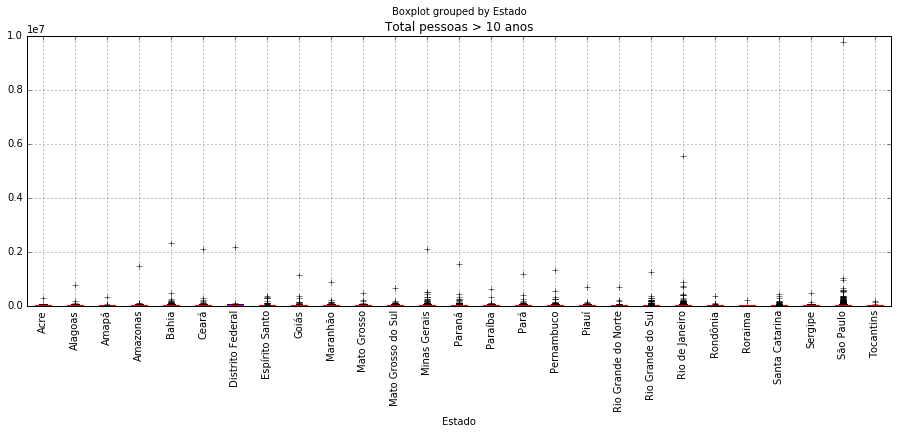

In [2]:
# o parâmetro rot=90 está indicando que a legenda está rotacionada 90 graus, para podermos ler melhor os nomes:
renda.boxplot("Total pessoas > 10 anos", by="Estado", figsize=(15,5), rot=90)

A única coisa que dá para enxergar no gráfico acima é que o boxplot referente a São Paulo tem um outlier (sinal +) bem acima de todos os outros (não surpreendentemente, São Paulo possui a maior população do país e a cidade de São Paulo tem uma população muito maior do que a população das outras cidades dentro do próprio estado).

Vamos visualizar apenas os estados do sul do Brasil:

In [ ]:
condicao = (renda["Estado"] == "Paraná") | (renda["Estado"] == "Santa Catarina") | (renda["Estado"] == "Rio Grande do Sul")
renda[condicao].boxplot("Total pessoas > 10 anos", by="Estado", figsize=(15,15), rot=90)

Veja que infelizmente os outliers estão nos impedindo de enxergar o restante do gráfico.

Eles são importantes: podemos ver, no Paraná, por exemplo, que tem uma cidade que tem mais de 1 milhão e meio de habitantes que foram entrevistados (provavelmente Curitiba):

In [ ]:
condicao = renda["Município"] == "Curitiba"
display(renda[condicao])

Mas o ponto é que a grande maioria das cidades do Paraná tiveram menos de 50000 habitantes entrevistados pelo censo (como podemos ver acima). 

Podemos usar a opção `showfliers=False` para omitir os outliers do boxplot:

In [ ]:
condicao = (renda["Estado"] == "Paraná") | (renda["Estado"] == "Santa Catarina") | (renda["Estado"] == "Rio Grande do Sul")
renda[condicao].boxplot("Total pessoas > 10 anos", by="Estado", rot=90, showfliers=False)

Veja que os dados utilizados para gerar o boxplot acima são os mesmos que aparecem no comando `describe()` que vimos anteriormente:

In [ ]:
condicao = (renda["Estado"] == "Paraná") | (renda["Estado"] == "Santa Catarina") | (renda["Estado"] == "Rio Grande do Sul")
renda_agrupada = renda[condicao].groupby("Estado")
# em renda_agrupada queremos observar apenas a coluna que tem o número de pessoas:
display(renda_agrupada["Total pessoas > 10 anos"].describe())

Ou seja, podemos utilizar o comando `describe()` se quisermos saber os valores com exatidão e podemos utilizar o gráfico para ter uma ideia mais visual.

## Correlação e Regressão

O foco das técnicas de correlação e regressão é a análise de dados amostrais visando descobrir como duas ou mais variáveis estão relacionadas uma com a outra.

A análise de **correlação** tem como resultado **um número**, que expressa o grau de relacionamento entre duas variáveis.

A análise de **regressão** expressa o resultado em **uma equação matemática**, descrevendo o relacionamento das variáveis.

Construir o gráfico de dispersão das variáveis é, usualmente, o primeiro passo em uma análise de correlação.

Nesse tipo de gráfico, simplesmente representamos os valores das duas variáveis como pares de coordenadas no plano,  para todos os exemplos da amostra.

Por exemplo, o gráfico a seguir é de dispersão em que o eixo $x$ representa horas de treinamento numa linha de produção de automóveis e o eixo $y$ representa o número de acidentes na fábrica.

<img width=50% src="http://professor.ufabc.edu.br/~carla.negri/cursos/2018Q2-BCC/images/corr-neg.png">

O gráfico mostra existência de correlação negativa, pois, à medida que $x$ cresce, $y$ decresce.

O gráfico mostra que a empresa, ao investir em treinamento, reduz o número de acidentes na fábrica.

No gráfico a seguir, o eixo $x$ representa a renda média da população e o eixo $y$ representa o consumo de bens duráveis em milhões/ano.

<img width=50% src="http://professor.ufabc.edu.br/~carla.negri/cursos/2018Q2-BCC/images/corr-pos.png">

A análise mostra que há correlação positiva, pois, à medida que $x$ cresce, $y$ também cresce.

O gráfico mostra que, com o aumento médio da renda da população (maior poder aquisitivo), o consumo de bens duráveis aumenta.

No gráfico a seguir, o peso de uma pessoa é representado no eixo $x$ enquanto seu Q.I. (Quociente de Inteligência) é representado no eixo $y$.

<img width=50% src="http://professor.ufabc.edu.br/~carla.negri/cursos/2018Q2-BCC/images/corr-nao.png">

Não há correlação alguma; o gráfico mostra que não existe evidência de alguma relação entre o peso de uma pessoa com seu Q.I.

Além da correlação linear, em que a relação entre as duas variáveis é expressa adequadamente por uma reta, podemos encontrar também correlação não-linear entre as variáveis.

Nesse caso, apesar de existir uma relação clara entre as variáveis, esta não pode ser modelada por uma reta, como no exemplo a seguir.

<img width=50% src="http://professor.ufabc.edu.br/~carla.negri/cursos/2018Q2-BCC/images/corr-nao-linear.png">


O Pandas oferece, na função `plot()` que já vimos, a opção `kind="scatter"`, que vai gerar um gráfico de dispersão.

Ela espera receber uma coluna para cada opção `x=` e `y=`, indicando quais dados serão comparados.

Vejamos um exemplo a seguir, comparando a temperatura com a nebulosidade em Santo André:

In [ ]:
temperatura.plot(x="Temperatura", y="Nebulosidade total (%)", kind="scatter")

De onde vemos que não há relação entre essas variáveis.


No exemplo a seguir, vamos comparar a média das listas dos alunos com a sua nota final.

In [ ]:
notas.plot(x="Listas", y="Nota Final", kind="scatter")

Vemos que há uma pequena correlação positiva entre essas variáveis: quanto maior a nota que o aluno tirou nas listas, maior sua nota final.

No nosso exemplo final, vamos verificar se há correlação entre a renda de uma pessoa e o fato de sua casa ter água encanada ou não.

Como o Pandas precisa que os dados estejam na mesma tabela, e as informações estão em tabelas diferentes, vamos uni-las para poder fazer o gráfico.

Visto que ambas as tabelas possuem informações sobre cada cidade brasileira, não é tão complicado fazer a união das mesmas:

In [ ]:
tabela_nova = pd.merge(renda, agua)
display(tabela_nova.head())

Veja como a união foi feita corretamente: colunas iguais foram completamente unidas.

Agora sim, podemos verificar se há alguma correlação entre os dados:

In [ ]:
tabela_nova.plot(x="Sem rendimento", y="Não tinham", kind="scatter")

Não parece haver relação entre pessoas que não têm rendimento e o fato de não haver água encanada nas casas.

Vamos ver o outro extremo desses dados: pessoas que têm rendimento maior do que 20 salários mínimos e o fato de haver água encanada:

In [ ]:
tabela_nova.plot(x="Mais de 20 SM", y="Água em pelo menos um cômodo", kind="scatter")

Agora começou a aparecer uma correlação linear positiva.

Com esses exemplos, podemos ver que utilizar apenas o gráfico de dispersão para interpretar a existência de uma correlação pode ser uma tarefa bastante subjetiva.

Como medida mais objetiva, utiliza-se medir o grau e o tipo de uma correlação linear entre duas variáveis por meio do cálculo do **coeficiente de correlação**.

O intervalo de variação do coeficiente de correlação $r$ está entre -1 e 1:
* Valor de $r$ próximo a 1: as variáveis têm forte correlação linear positiva
* Valor de $r$ próximo a -1: as variáveis têm forte correlação linear negativa
* Valor de $r$ próximo de zero: ou não existe ou existe pouca correlação linear entre as variáveis

Existe uma fórmula para calcular esse coeficiente, mas ela não é nada bonita e muito menos prática de se fazer "à mão".

O Pandas oferece a função `corr()` para calcular esse coeficiente.

Essa função é aplicada na tabela toda, e faz comparação par a par das colunas.

Vejamos o seu resultado nos exemplos anteriores.

In [6]:
display(temperatura.corr())

,Ano,Mês,Dia,Hora,Minuto,Temperatura,Total precipitação (mm),Nebulosidade total (%),Duração do sol (min)
Ano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mês,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dia,NaN,NaN,1.000000,0.000000,NaN,-0.191331,0.127713,0.446908,-0.175475
Hora,NaN,NaN,0.000000,1.000000,NaN,0.414834,0.079712,-0.021967,0.120280
Minuto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperatura,NaN,NaN,-0.191331,0.414834,NaN,1.000000,-0.310297,-0.553129,0.678613
Total precipitação (mm),NaN,NaN,0.127713,0.079712,NaN,-0.310297,1.000000,0.468974,-0.235229
Nebulosidade total (%),NaN,NaN,0.446908,-0.021967,NaN,-0.553129,0.468974,1.000000,-0.517435
Duração do sol (min),NaN,NaN,-0.175475,0.120280,NaN,0.678613,-0.235229,-0.517435,1.000000


No exemplo acima vemos que o coeficiente de correlação entre a temperatura e a nebulosidade total é de -0.553129 (veja novamente o gráfico, que não nos deixava perceber correlação alguma). Não é um valor tão próximo de -1, de modo que não podemos afirmar muita coisa.

In [ ]:
display(notas.corr())

Como havíamos observado no gráfico, há correlação positiva entre a nota das listas e a nota final do aluno. Vemos agora que o coeficiente de correlação é de 0.883811, bem próximo de 1.

In [ ]:
display(tabela_nova.corr())

Por fim, vemos que o coeficiente de correlação entre não ter rendimento e não ter água na propriedade é de 0.168539, bem próximo a 0, de fato indicando que não há correlação entre essas variáveis.

E também vemos que o coeficiente de correlação entre ganhar mais de 20 salários mínimos e ter água em pelo menos um cômodo é de 0.902235, próximo a 1, reforçando a ideia mostrada no gráfico (não estava tão claro no gráfico, mas agora podemos ter certeza).

Depois de constatar que existe uma correlação linear significante, é possível escrever uma equação que descreva a relação linear entre as variáveis.

Essa equação chama-se **reta de regressão**.

Não veremos nessa disciplina como criar tal reta no gráfico (fique à vontade para procurar isso por conta própria), mas veja a seguir um exemplo.

O gráfico a seguir mostra uma correlação entre o número de faltas dos alunos por semestre e a suas respectivas notas finais numa determinada disciplina.

A reta que aparece entre os pontos do gráfico de dispersão é a reta de regressão e sua equação encontra-se escrita na imagem.

<img width=50% src="http://professor.ufabc.edu.br/~carla.negri/cursos/2018Q2-BCC/images/reta.png">


## Causalidade vs. correlação

Por fim, vale uma última informação: **correlação não necessariamente implica causalidade**.

Uma associação significativa entre duas variáveis não necessariamente implica uma relação de causa e efeito.

Veja no exemplo a seguir que há uma forte correlação entre consumo de queijo per capita e número de pessoas que morreram por se enroscarem em seus lençóis (veja que o coeficiente de correlação é muito próximo a 1), mas claramente uma situação não causa a outra.

<img width=90% src="http://professor.ufabc.edu.br/~carla.negri/cursos/2018Q2-BCC/images/corr-cause.png">

Você pode ver outros exemplos de correlações desse tipo [nesse site](http://www.tylervigen.com/spurious-correlations).
